# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [39]:
sinasc_raw = pd.read_csv('sinasc_ro_2019.csv')
sinasc_raw.head()
print(sinasc_raw.columns)

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [40]:
sinasc_raw['Latitude do município'] = np.where(sinasc_raw['munResLat'] < -10.5, 'Abaixo de -10.5', 'Acima de -10.5')

grupo_variaveis_1 = sinasc_raw.groupby('Latitude do município').agg({'QTDPARTNOR': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
                                                                      'QTDPARTCES': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})

grupo_variaveis_1.head()

QTDPARTNOR                                        \
                             sum      mean  min   max median       std   
Latitude do município                                                    
Abaixo de -10.5           5800.0  0.452242  0.0  41.0    0.0  1.123426   
Acima de -10.5            8772.0  0.711782  0.0  40.0    0.0  1.278993   

                                QTDPARTCES                              \
                            var        sum      mean  min   max median   
Latitude do município                                                    
Abaixo de -10.5        1.262087     7095.0  0.552570  0.0  12.0    0.0   
Acima de -10.5         1.635823     6041.0  0.487295  0.0  12.0    0.0   

                                           
                            std       var  
Latitude do município                      
Abaixo de -10.5        0.753036  0.567062  
Acima de -10.5         0.737882  0.544470

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [41]:
sinasc_raw['Área do município'] = np.where(sinasc_raw['munResArea'] < 3000, 'Abaixo de 3000', 'Acima de 3000')

grupo_variaveis_2 = sinasc_raw.groupby('Área do município').agg({'QTDGESTANT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
                                                                  'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})

grupo_variaveis_2.head()

QTDGESTANT                                                  \
                         sum      mean  min   max median       std       var   
Área do município                                                              
Abaixo de 3000        5870.0  1.134300  0.0   9.0    1.0  1.208914  1.461473   
Acima de 3000        27048.0  1.310402  0.0  52.0    1.0  1.447402  2.094974   

                  IDADEMAE                                                 
                       sum       mean min max median       std        var  
Área do município                                                          
Abaixo de 3000      137389  26.324775  11  53   26.0  6.305535  39.759775  
Acima de 3000       567872  26.038425  12  53   25.0  6.405365  41.028696

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [42]:
grupo_variaveis_3 = sinasc_raw.groupby('Latitude do município').agg({'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
                                                                      'QTDFILMORT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})
grupo_variaveis_3.head()

QTDFILVIVO                                        \
                             sum      mean  min   max median       std   
Latitude do município                                                    
Abaixo de -10.5          12600.0  0.980011  0.0  30.0    1.0  1.138300   
Acima de -10.5           14227.0  1.129306  0.0  12.0    1.0  1.198566   

                                QTDFILMORT                              \
                            var        sum      mean  min   max median   
Latitude do município                                                    
Abaixo de -10.5        1.295727     3105.0  0.242521  0.0  28.0    0.0   
Acima de -10.5         1.436561     3539.0  0.291828  0.0   9.0    0.0   

                                           
                            std       var  
Latitude do município                      
Abaixo de -10.5        0.599430  0.359317  
Acima de -10.5         0.627863  0.394212

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [43]:
sinasc_v1 = sinasc_raw[['IDADEMAE','munResNome','DTNASC']]
sinasc_v1.head()

,IDADEMAE,munResNome,DTNASC
0,19,Alta Floresta D'Oeste,2019-02-19
1,29,Alta Floresta D'Oeste,2019-02-21
2,37,Alta Floresta D'Oeste,2019-02-25
3,30,Alto Alegre dos Parecis,2019-03-20
4,30,Alta Floresta D'Oeste,2019-03-23


In [44]:
# Inicialmente crio o dataframe com as regiões imediatas

intermediarias = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [45]:
# Criando uma nova coluna no dataframe para incluir as regiões e assim poder fazer o gráfico

sinasc_v1.loc[:, 'Região Intermediária'] = sinasc_v1['munResNome'].map(intermediarias)

# Agrupando os valores por regiões e realizando a média de idade
idade_media_mulheres = sinasc_v1.groupby(['Região Intermediária', 'DTNASC'])['IDADEMAE'].mean()
idade_media_mulheres

C:\Users\rafa_\AppData\Local\Temp\ipykernel_2656\266888785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_v1.loc[:, 'Região Intermediária'] = sinasc_v1['munResNome'].map(intermediarias)


Região Intermediária  DTNASC    
Ariquemes             2019-01-01    23.200000
                      2019-01-02    26.166667
                      2019-01-03    24.142857
                      2019-01-04    24.666667
                      2019-01-05    22.888889
                                      ...    
Vilhena               2019-12-27    27.000000
                      2019-12-28    22.666667
                      2019-12-29    24.250000
                      2019-12-30    26.600000
                      2019-12-31    23.857143
Name: IDADEMAE, Length: 2181, dtype: float64

In [46]:
# Após o mapping das zonas e o calculo das médias, crio o gráfico com a idade média das mulheres de cada região imediata.
# Separoas médias por cada um das regiões intermediarias

media_porto_velho = idade_media_mulheres['Porto Velho']
media_ariquemes = idade_media_mulheres['Ariquemes']
media_ji_paraná = idade_media_mulheres['Ji-Paraná']
media_cacoal = idade_media_mulheres['Cacoal']
media_vilhena = idade_media_mulheres['Vilhena']

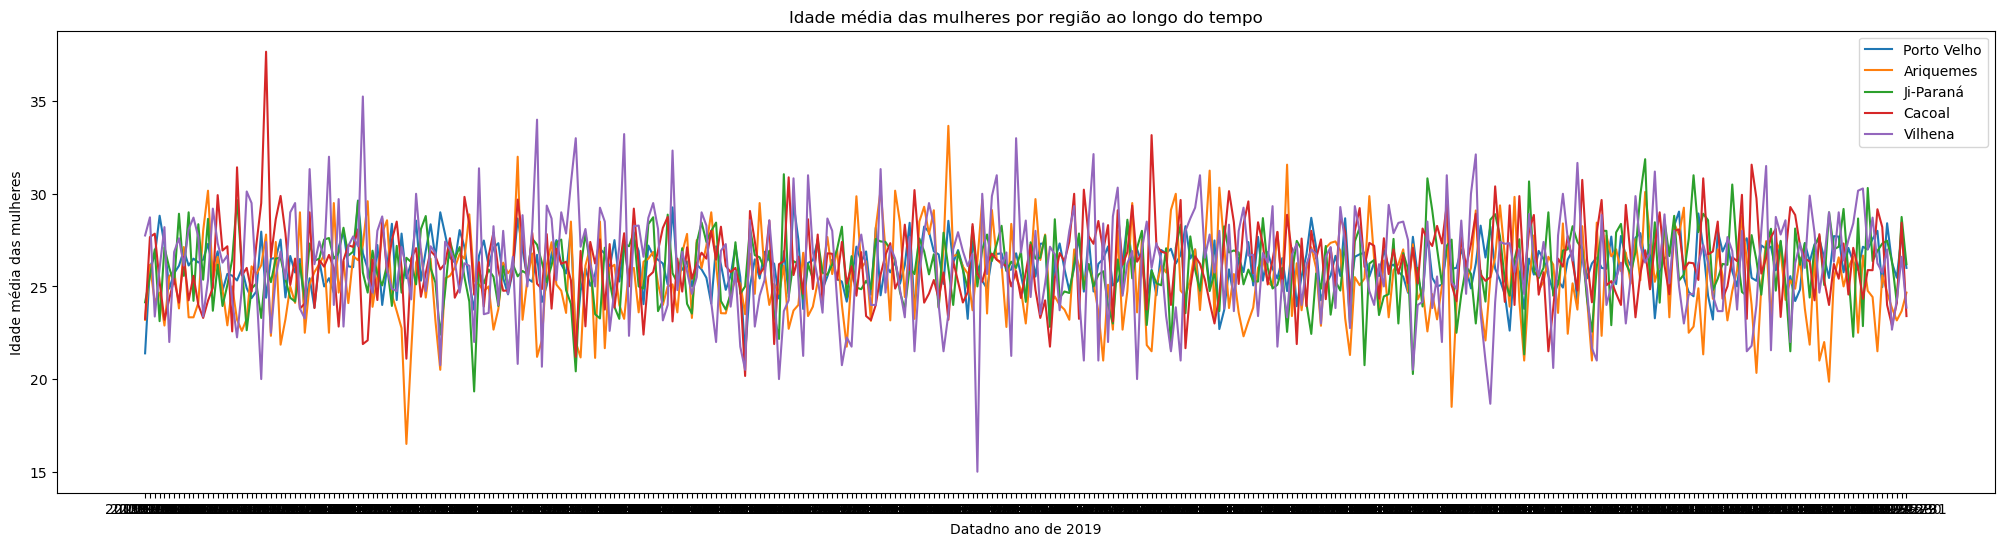

In [47]:
#Crio o plot do gráfico com cada um dos grupos que criei, sendo uma das linhas

fig, ax = plt.subplots(figsize=(25,6))

ax.plot(media_porto_velho.index, media_porto_velho.values, label='Porto Velho')
ax.plot(media_ariquemes.index, media_ariquemes.values, label='Ariquemes')
ax.plot(media_ji_paraná.index, media_ji_paraná.values, label='Ji-Paraná')
ax.plot(media_cacoal.index, media_cacoal.values, label='Cacoal')
ax.plot(media_vilhena.index, media_vilhena.values, label='Vilhena')

ax.set_xlabel('Datadno ano de 2019')
ax.set_ylabel('Idade média das mulheres')
ax.set_title('Idade média das mulheres por região ao longo do tempo')

ax.legend()
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [48]:
# Para facilitar o trabalho de coleta de dados, utilizei uma tabela em excel com os dados do IDH por municipio
# do link

IDH_muni = pd.read_excel('IDH.xlsx')

In [49]:
# Após os dados atribuidos a um dataframe vou incluir uma coluna com as classificações: Muito alto, Alto, Médio, Baixo, Muito baixo.
# Primeiro crio os limites para usar na classificação

limites_IDH = [0, 0.499, 0.599, 0.699, 0.799, 1.000]
classificacao_IDH = ['IDH muito baixo', 'IDH baixo', 'IDH médio', 'IDH alto', 'IDH muito alto']

# Agora crio a coluna com as classificações

IDH_muni['Categoria'] = pd.cut(IDH_muni['IDH'], bins=limites_IDH, labels=classificacao_IDH, right=False)

print(IDH_muni)

                   Municipios    IDH  Categoria
0                 Porto Velho  0.736   IDH alto
1                     Vilhena  0.731   IDH alto
2                      Cacoal  0.718   IDH alto
3                   Ji-Paraná  0.714   IDH alto
4               Pimenta Bueno  0.710   IDH alto
5                   Ariquemes  0.702   IDH alto
6              Rolim de Moura  0.700   IDH alto
7                  Cerejeiras  0.692  IDH médio
8                        Jaru  0.689  IDH médio
9           Colorado do Oeste  0.685  IDH médio
10        Ouro Preto do Oeste  0.682  IDH médio
11            Espigão d'Oeste  0.672  IDH médio
12        Santa Luzia d'Oeste  0.670  IDH médio
13       Pimenteiras do Oeste  0.665  IDH médio
14          Presidente Médici  0.664  IDH médio
15               Castanheiras  0.658  IDH médio
16              Guajará-Mirim  0.657  IDH médio
17                Chupinguaia  0.652  IDH médio
18                     Cabixi  0.650  IDH médio
19         Candeias do Jamari  0.649  ID

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [50]:
# Para facilitar o trabalho de coleta de dados, utilizei uma tabela em excel com os dados do IFDM por municipio
# do link

IFDM_muni = pd.read_excel('IFDM.xlsx')

# Após os dados atribuidos a um dataframe vou incluir uma coluna com as classificações: Alto, Moderado, Regular, Baixo.
# Primeiro crio os limites para usar na classificação

limites_IFDM = [0, 0.3999, 0.5999, 0.7999, 1]
classificacao_IFDM = ['Baixo', 'Regular', 'Moderado', 'Alto']

# Agora crio a coluna com as classificações

IFDM_muni['Categoria'] = pd.cut(IFDM_muni['IFDM'], bins = limites_IFDM, labels = classificacao_IFDM, right = False)

print(IFDM_muni)

                   Municipios    IFDM Categoria
0                   Ariquemes  0.7746  Moderado
1                     Vilhena  0.7465  Moderado
2               Pimenta Bueno  0.7383  Moderado
3                 Porto Velho  0.7257  Moderado
4                   Ji-Paraná  0.7117  Moderado
5                      Cacoal  0.7111  Moderado
6         Santa Luzia d'Oeste  0.6850  Moderado
7              Rolim de Moura  0.6785  Moderado
8                 Chupinguaia  0.6766  Moderado
9       São Miguel do Guaporé  0.6699  Moderado
10       Pimenteiras do Oeste  0.6501  Moderado
11              Teixeirópolis  0.6500  Moderado
12          Colorado do Oeste  0.6473  Moderado
13                       Jaru  0.6450  Moderado
14                 Rio Crespo  0.6430  Moderado
15      Primavera de Rondônia  0.6384  Moderado
16      Alta Floresta d'Oeste  0.6337  Moderado
17        Ouro Preto do Oeste  0.6261  Moderado
18   São Francisco do Guaporé  0.6214  Moderado
19         Candeias do Jamari  0.6199  M

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [51]:
# Para facilitar o trabalho de coleta de dados, utilizei uma tabela em excel com os dados do PIB por municipio
# do link

PIB_muni = pd.read_excel('PIB.xlsx')
PIB_muni['PIB'] = PIB_muni['PIB'].str.replace(' ', '').astype(float)

print(PIB_muni)

                   Municipios         PIB
0                 Porto Velho  17912070.0
1                   Ji-Paraná   3783972.0
2                     Vilhena   2831175.0
3                   Ariquemes   2579830.0
4                      Cacoal   2261644.0
5                        Jaru   1500890.0
6              Rolim de Moura   1283434.0
7               Pimenta Bueno   1164877.0
8               Guajará-Mirim    893000.0
9         Ouro Preto do Oeste    834000.0
10                    Buritis    726000.0
11        Machadinho do Oeste    633000.0
12            Espigão d'Oeste    625000.0
13      São Miguel do Guaporé    616000.0
14         Candeias do Jamari    548000.0
15                Nova Mamoré    529000.0
16                 Cerejeiras    507000.0
17     Alta Floresta do Oeste    496000.0
18          Presidente Médici    428000.0
19                    Cujubim    385000.0
20  Nova Brasilândia do Oeste    360000.0
21               Alto Paraíso    358000.0
22   São Francisco do Guaporé    3

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Primeiramente gostaria de saber de existem alguma correlacão entre o PIB dos municípios e a qualidade de vida e desenvolvimento social deles, para isso irei utilizar dois gráficos para estudar essas correlações.

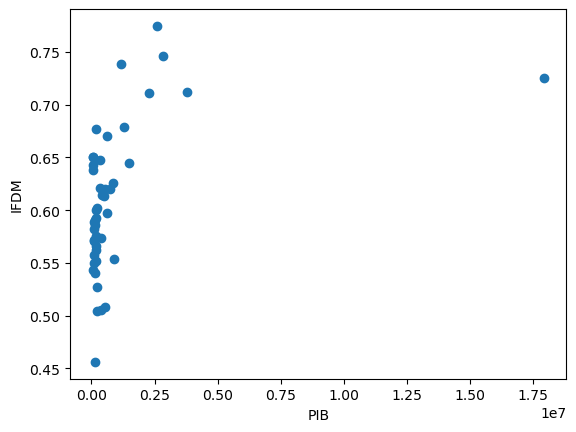

In [52]:
# Vou fazer um merge dos DataFrames com os dados
df_merged_ifdm = pd.merge(PIB_muni, IFDM_muni, on='Municipios')

# Criar o gráfico de dispersão
plt.scatter(df_merged_ifdm['PIB'], df_merged_ifdm['IFDM'])

# Definir rótulos dos eixos
plt.xlabel('PIB')
plt.ylabel('IFDM')

# Exibir o gráfico
plt.show()

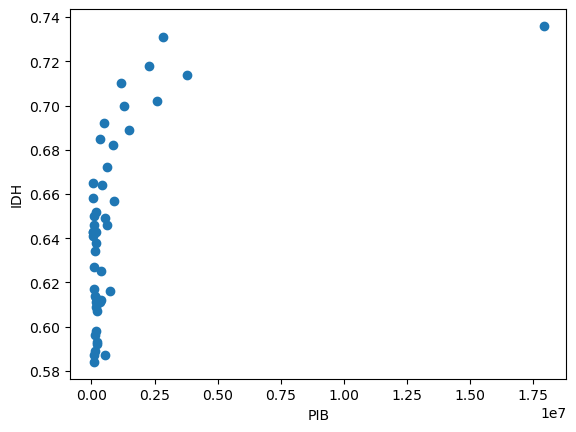

In [53]:
df_merged_idh = pd.merge(PIB_muni, IDH_muni, on='Municipios')

# Criar o gráfico de dispersão
plt.scatter(df_merged_idh['PIB'], df_merged_idh['IDH'])

# Definir rótulos dos eixos
plt.xlabel('PIB')
plt.ylabel('IDH')

# Exibir o gráfico
plt.show()

Utilizando os gráficos é possível observar que em ambos os indices de desenvolvimento, o PIB de Porto Velho que chega a ser quase 5 vezes maior que o de Ji-Paraná, não acarretou uma melhora significativa em seus indices de desenvolvimento. Algo que vai de encontro com o senso comum de que quando existe uma maior arrecadação ou mais dinheiro no município, isto não se reflete em utilizadades sociais para melhorar os indices dos municípios.